# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

tornado_data = pd.read_csv('Resources/1950-2018_all_tornadoes.csv')
tornado_data.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,Happen
0,152,1965,4,11,4/11/1965,18:20:00,3,IN,18,14,...,880,1,1,1,23,67,53,0,0,NaN
1,66,1971,2,21,2/21/1971,16:00:00,3,MS,28,12,...,100,2,0,1,0,0,0,0,0,NaN
2,66,1971,2,21,2/21/1971,16:00:00,3,MS,28,12,...,100,2,1,2,55,125,53,83,0,NaN
3,162,1953,5,11,5/11/1953,16:10:00,3,TX,48,9,...,583,1,1,1,309,0,0,0,0,NaN
4,1147,1999,5,3,5/3/1999,17:26:00,3,OK,40,36,...,1430,1,1,1,51,87,27,109,0,NaN


In [3]:
X = tornado_data[["yr", "mo", "stf", "mag", "len", "wid", "loss", "fat", "inj"]]
y = tornado_data["fat"].values.reshape(-1, 1)
print(X.shape, y.shape)

(64511, 9) (64511, 1)


We can encode multiple columns using `get_dummies`.

In [4]:
tornado_data = X.copy()

data_binary_encoded = pd.get_dummies(tornado_data)
data_binary_encoded.head()

,yr,mo,stf,mag,len,wid,loss,fat,inj
0,1965,4,18,4,48.0,880,8.0,25,835
1,1971,2,28,4,202.1,100,4.0,58,795
2,1971,2,28,4,198.5,100,0.0,58,795
3,1953,5,48,5,20.9,583,7.0,114,597
4,1999,5,40,5,37.0,1430,1000.0,36,583


## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

In [5]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,yr,mo,stf,mag,len,wid,loss,fat,inj
32292,1990,6,29,1,0.2,50,0.00,0,0
8570,1954,2,5,2,1.0,33,2.00,0,0
2825,1957,4,28,2,40.7,200,4.00,0,4
16264,1967,9,48,0,0.1,10,0.00,0,0
39635,1997,5,48,1,0.5,20,0.01,0,0


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

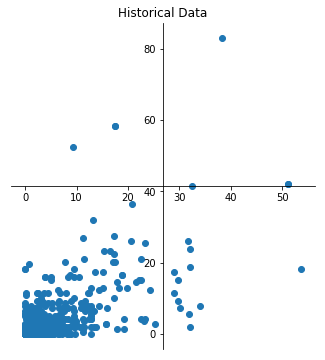

In [8]:
fig1 = plt.figure(figsize=(12, 6))
#axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

#axes1.set_title("Original Data")
axes2.set_title("Historical Data")

maxx = X_train["inj"].max()
maxy = y_train.max()
#axes1.set_xlim(-maxx + 1, maxx + 1)
#axes1.set_ylim(-maxy + 1, maxy + 1)

#axes2.set_xlim(-2, 2)
#axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
#set_axes(axes1)
set_axes(axes2)

#axes1.scatter(X_train["inj"], y_train)
axes2.scatter(X_train_scaled[:,-1], y_train_scaled[:])

In [9]:
plt.show()

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

Step 2) Split data into training and testing data

In [10]:
from sklearn.model_selection import train_test_split
X = tornado_data["inj"].values.reshape(-1, 1)
y = tornado_data["fat"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

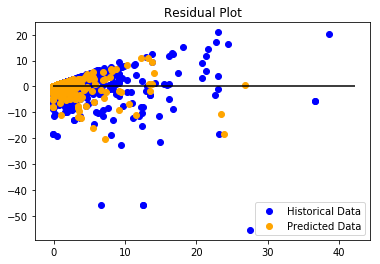

In [12]:
# Plot the results 
# pass data into the model from the years to get predictions from. 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Historical Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Predicted Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [13]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2515813524001428, R2: 0.6171993027680188


Your Turn!